Now you've built a KNN model!

## Challenge: Implement the Nearest Neighbor algorithm 

The Nearest Neighbor algorithm is extremely simple. So simple, in fact, that you should be able to build it yourself from scratch using the Python you already know. Code a Nearest Neighbors algorithm that works for two dimensional data. You can use either arrays or dataframes to do this. Test it against the SKLearn package on the music dataset from above to ensure that it's correct. The goal here is to confirm your understanding of the model and continue to practice your Python skills. We're just expecting a brute force method here. After doing this, look up "ball tree" methods to see a more performant algorithm design.

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
%matplotlib inline

# K Nearest Neighbors Classifiers

So far we've covered learning via probability (naive Bayes) and learning via errors (regression). Here we'll cover learning via similarity. This means we look for the datapoints that are most similar to the observation we are trying to predict.

Let's start by the simplest example: **Nearest Neighbor**.

## Nearest Neighbor

Let's use this example: classifying a song as either "rock" or "jazz". For this data we have measures of duration in seconds and loudness in loudness units (we're not going to be using decibels since that isn't a linear measure, which would create some problems we'll get into later).

In [47]:
music = pd.DataFrame()

# Some data to play with.
music['duration'] = [184, 134, 243, 186, 122, 197, 294, 382, 102, 264, 
                     205, 110, 307, 110, 397, 153, 190, 192, 210, 403,
                     164, 198, 204, 253, 234, 190, 182, 401, 376, 102]
music['loudness'] = [18, 34, 43, 36, 22, 9, 29, 22, 10, 24, 
                     20, 10, 17, 51, 7, 13, 19, 12, 21, 22,
                     16, 18, 4, 23, 34, 19, 14, 11, 37, 42]

# We know whether the songs in our training data are jazz or not.
music['jazz'] = [ 1, 0, 0, 0, 1, 1, 0, 1, 1, 0,
                  0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
                  1, 1, 1, 1, 0, 0, 1, 1, 0, 0]

In [48]:
# Your nearest neighbor algorithm here.
df_distance = music.copy()

# when music to check has duration==290, loudness==24
music_check = (290,24)
distance_list = [np.sqrt((duration-music_check[0])**2 + (loudness-music_check[1])**2) for (duration, loudness) in zip(df_distance.duration, df_distance.loudness) ]
df_distance['dist'] = distance_list

df_distance[df_distance.dist == df_distance.dist.min()]
if df_distance[df_distance.dist == df_distance.dist.min()]['jazz'].values ==1:
    print("the music to check is jazz")
else:
    print("the music to check is rock")

the music to check is rock


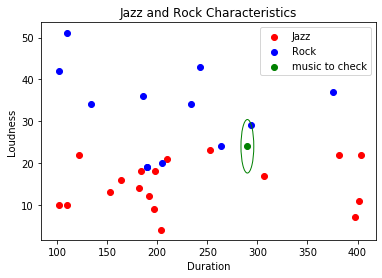

In [49]:
jazz_song = music[music['jazz']==1]
rock_song = music[music['jazz']==0]

fig, ax = plt.subplots()
plt.scatter(jazz_song.duration, jazz_song.loudness, c='r')
plt.scatter(rock_song.duration, rock_song.loudness, c='b')
plt.scatter(290,24,c='g')
circle= plt.Circle((290, 24), radius=df_distance[df_distance.dist == df_distance.dist.min()]['dist'].values, color='g', fill=False)
ax.add_artist(circle)
plt.legend(['Jazz', 'Rock', 'music to check'])
plt.title('Jazz and Rock Characteristics')
plt.xlabel('Duration')
plt.ylabel('Loudness')

plt.show()

In [50]:
# compare with sklearn package
from sklearn.neighbors import KNeighborsClassifier
neighbors = KNeighborsClassifier(n_neighbors=1)
X = music[['loudness', 'duration']]
Y = music.jazz
neighbors.fit(X,Y)

## Predict for a song with 24 loudness that's 190 seconds long.
print(neighbors.predict([[24, 190]]))

[0]
